In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
os.makedirs("../plots/channel_kpis", exist_ok=True)
df = pd.read_csv("../data/cleaned_superstore.csv")

In [3]:
kpis = {"KPI": [], "Value": []}

In [ ]:
# Avg Web Purchases
avg_web = df["NumWebPurchases"].mean()

kpis["KPI"].append("Avg Web Purchases")
kpis["Value"].append(round(avg_web, 2))

In [ ]:
# Avg Catalog Purchases
avg_cat = df["NumCatalogPurchases"].mean()

kpis["KPI"].append("Avg Catalog Purchases")
kpis["Value"].append(round(avg_cat, 2))

In [ ]:
# Avg Store Purchases
avg_store = df["NumStorePurchases"].mean()

kpis["KPI"].append("Avg Store Purchases")
kpis["Value"].append(round(avg_store, 2))

In [ ]:
# Web Visits per Month
avg_visits = df["NumWebVisitsMonth"].mean()

kpis["KPI"].append("Avg Web Visits per Month")
kpis["Value"].append(round(avg_visits, 2))

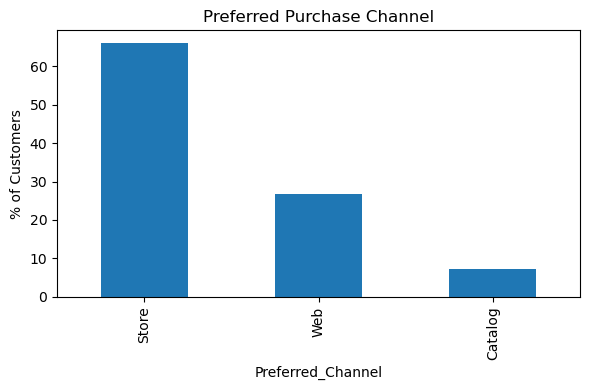

In [7]:
def channel_pref(row):
    purchases = {
        "Web": row["NumWebPurchases"],
        "Catalog": row["NumCatalogPurchases"],
        "Store": row["NumStorePurchases"]
    }
    return max(purchases, key=purchases.get)

df["Preferred_Channel"] = df.apply(channel_pref, axis=1)

channel_dist = df["Preferred_Channel"].value_counts(normalize=True) * 100

kpis["KPI"].append("Purchase Channel Preference")
kpis["Value"].append("; ".join([f"{k}: {v:.2f}%" for k, v in channel_dist.items()]))

plt.figure(figsize=(6, 4))
channel_dist.plot(kind="bar", title="Preferred Purchase Channel")
plt.ylabel("% of Customers")
plt.tight_layout()
plt.savefig("../plots/channel_kpis/preferred_channel.png")
plt.show()

In [8]:
pd.DataFrame(kpis).to_csv("../exports/channel_kpis_summary.csv", index=False)